In [1]:
print("Bissmillahirrahmanirrahim top 50 product capstone")

Bissmillahirrahmanirrahim top 50 product capstone


In [2]:
import tensorflow as tf
print(tf.__version__)

2.12.0


downloading our facential datasets

In [3]:
#Download the training set

!wget https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_types_train.zip

--2023-05-22 13:56:21--  https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_types_train.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 108.177.11.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 642900160 (613M) [application/zip]
Saving to: ‘faceSkin_types_train.zip’

faceSkin_types_trai 100%[===================>] 613.12M  15.5MB/s    in 43s     

2023-05-22 13:57:05 (14.4 MB/s) - ‘faceSkin_types_train.zip’ saved [642900160/642900160]



In [4]:
#Download the validation set

!wget https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_types_validation.zip


--2023-05-22 13:57:05--  https://storage.googleapis.com/facentiap-dataset-zip/faceSkin_types_validation.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 74.125.26.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172197856 (164M) [application/zip]
Saving to: ‘faceSkin_types_validation.zip’

faceSkin_types_vali 100%[===================>] 164.22M  12.1MB/s    in 16s     

2023-05-22 13:57:23 (10.2 MB/s) - ‘faceSkin_types_validation.zip’ saved [172197856/172197856]



download the pretrained model

In [5]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-05-22 13:57:23--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.13.128, 74.125.26.128, 172.217.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.13.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   145MB/s    in 0.6s    

2023-05-22 13:57:24 (145 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



unzip validation dan train dataset


In [6]:
import os
import zipfile

# Unzip training set
local_zip = './faceSkin_types_train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./faceSkin_types_train')

# Unzip validation set
local_zip = './faceSkin_types_validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./faceSkin_types_validation')

zip_ref.close()

 define the directories containing your images

In [7]:
# variabel directory for training pict for each category
train_oily_dir = os.path.join("./faceSkin_types_train/oily")
train_normal_dir = os.path.join("./faceSkin_types_train/normal")
train_combination_dir =os.path.join("./faceSkin_types_train/combination")
train_sensitive_dir = os.path.join("./faceSkin_types_train/sensitive")
train_dry_dir = os.path.join("./faceSkin_types_train/dry")

# variabel directory for validation pict for each category
validation_oily_dir =os.path.join("/content/faceSkin_types_validation/oily")
validation_normal_dir =os.path.join("/content/faceSkin_types_validation/normal")
validation_combination_dir =os.path.join("/content/faceSkin_types_validation/combination")
validation_sensitive_dir =os.path.join("/content/faceSkin_types_validation/sensitive")
validation_dry_dir =os.path.join("/content/faceSkin_types_validation/dry")

filenames check in directory

In [8]:
train_dry_names = os.listdir(train_dry_dir)
train_oily_names = os.listdir(train_oily_dir)
train_normal_names =  os.listdir(train_normal_dir)
train_combination_names =  os.listdir(train_combination_dir)
train_sensitive_names =  os.listdir(train_sensitive_dir)

validation_dry_names = os.listdir(validation_dry_dir)
validation_oily_names = os.listdir(validation_oily_dir)
validation_normal_names =  os.listdir(validation_normal_dir)
validation_combination_names =  os.listdir(validation_combination_dir)
validation_sensitive_names =  os.listdir(validation_sensitive_dir)

print(f'TRAIN SET DRY: {train_dry_names[:5]}')
print(f'TRAIN SET OILY: {train_dry_names[:5]}')
print(f'TRAIN SET SENSITIVE: {train_dry_names[:5]}')
print(f'TRAIN SET COMBINATION: {train_dry_names[:5]}')
print(f'TRAIN SET NORMAL: {train_dry_names[:5]} \n')

print(f'VALIDATION SET DRY: {validation_dry_names[:5]}')
print(f'VALIDATION SET OILY: {validation_dry_names[:5]}')
print(f'VALIDATION SET SENSITIVE: {validation_dry_names[:5]}')
print(f'VALIDATION SET COMBINATION: {validation_dry_names[:5]}')
print(f'VALIDATION SET NORMAL: {validation_dry_names[:5]}')

TRAIN SET DRY: ['1 (131).jpg', '1 (141).jpg', '1 (24).jpg', '1 (32).jpg', '1 (54).jpg']
TRAIN SET OILY: ['1 (131).jpg', '1 (141).jpg', '1 (24).jpg', '1 (32).jpg', '1 (54).jpg']
TRAIN SET SENSITIVE: ['1 (131).jpg', '1 (141).jpg', '1 (24).jpg', '1 (32).jpg', '1 (54).jpg']
TRAIN SET COMBINATION: ['1 (131).jpg', '1 (141).jpg', '1 (24).jpg', '1 (32).jpg', '1 (54).jpg']
TRAIN SET NORMAL: ['1 (131).jpg', '1 (141).jpg', '1 (24).jpg', '1 (32).jpg', '1 (54).jpg'] 

VALIDATION SET DRY: ['1 (202).jpg', '1 (182).jpg', '1 (223).jpg', '1 (215).jpg', '1 (210).jpg']
VALIDATION SET OILY: ['1 (202).jpg', '1 (182).jpg', '1 (223).jpg', '1 (215).jpg', '1 (210).jpg']
VALIDATION SET SENSITIVE: ['1 (202).jpg', '1 (182).jpg', '1 (223).jpg', '1 (215).jpg', '1 (210).jpg']
VALIDATION SET COMBINATION: ['1 (202).jpg', '1 (182).jpg', '1 (223).jpg', '1 (215).jpg', '1 (210).jpg']
VALIDATION SET NORMAL: ['1 (202).jpg', '1 (182).jpg', '1 (223).jpg', '1 (215).jpg', '1 (210).jpg']


chacking total number of images for each categories in training and validation directories 

In [9]:
print(f'total training oily images: {len(os.listdir(train_oily_dir))}')
print(f'total training dry images: {len(os.listdir(train_dry_dir))}')
print(f'total training normal images: {len(os.listdir(train_normal_dir))}')
print(f'total training combination images: {len(os.listdir(train_combination_dir))}')
print(f'total training sensitive images: {len(os.listdir(train_sensitive_dir))}\n')


print(f'total validation oily images: {len(os.listdir(validation_oily_dir))}')
print(f'total validation dry images: {len(os.listdir(validation_dry_dir))}')
print(f'total validation normal images: {len(os.listdir(validation_normal_dir))}')
print(f'total validation combination images: {len(os.listdir(validation_combination_dir))}')
print(f'total validation sensitive images: {len(os.listdir(validation_sensitive_dir))}')




total training oily images: 44
total training dry images: 42
total training normal images: 57
total training combination images: 22
total training sensitive images: 12

total validation oily images: 12
total validation dry images: 11
total validation normal images: 15
total validation combination images: 6
total validation sensitive images: 4


# Data preprocessing


using image data generator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
      rescale=1/255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(
      rescale=1/255,
      )

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './faceSkin_types_train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 600x600
        batch_size=5,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='categorical')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './faceSkin_types_validation',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 600x600
        batch_size=5,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='categorical')

Found 177 images belonging to 5 classes.
Found 48 images belonging to 5 classes.


load pretrained model

In [11]:

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [12]:
pre_trained_model.summary()


Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

In [13]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output
print('last layer output: ', last_output)

last layer output shape:  (None, 17, 17, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 17, 17, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


# add dense layer depends on the classification (5 category)


In [14]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (5, activation='softmax')(x)           

# Append the dense network to the base model
model = Model(pre_trained_model.input, x) 

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

# Building Model (klo ga pake transfer learning)

In [15]:

# model = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(600, 600, 3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     #tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     #tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     #tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
    
#     # will give a 5 output value, 
#     tf.keras.layers.Dense(5, activation='softmax')
# ])

compiling the model

In [26]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Training

In [27]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=10,
      verbose=2,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/10
8/8 - 88s - loss: 38.4871 - accuracy: 0.3000 - val_loss: 32.3491 - val_accuracy: 0.2500 - 88s/epoch - 11s/step
Epoch 2/10
8/8 - 67s - loss: 22.6171 - accuracy: 0.1750 - val_loss: 15.3328 - val_accuracy: 0.2250 - 67s/epoch - 8s/step
Epoch 3/10
8/8 - 66s - loss: 15.2968 - accuracy: 0.3243 - val_loss: 27.6353 - val_accuracy: 0.3000 - 66s/epoch - 8s/step
Epoch 4/10
8/8 - 67s - loss: 22.3180 - accuracy: 0.2750 - val_loss: 22.0339 - val_accuracy: 0.1000 - 67s/epoch - 8s/step
Epoch 5/10
8/8 - 65s - loss: 17.1959 - accuracy: 0.2000 - val_loss: 17.4391 - val_accuracy: 0.3000 - 65s/epoch - 8s/step
Epoch 6/10
8/8 - 67s - loss: 15.8751 - accuracy: 0.3500 - val_loss: 23.0045 - val_accuracy: 0.2000 - 67s/epoch - 8s/step
Epoch 7/10
8/8 - 65s - loss: 21.4016 - accuracy: 0.2250 - val_loss: 13.1758 - val_accuracy: 0.2750 - 65s/epoch - 8s/step
Epoch 8/10
8/8 - 62s - loss: 13.3854 - accuracy: 0.4054 - val_loss: 9.1967 - val_accuracy: 0.2000 - 62s/epoch - 8s/step
Epoch 9/10
8/8 - 90s - loss: 8.1

In [28]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# evaluating accuracy and loss for the model


<Figure size 640x480 with 0 Axes>

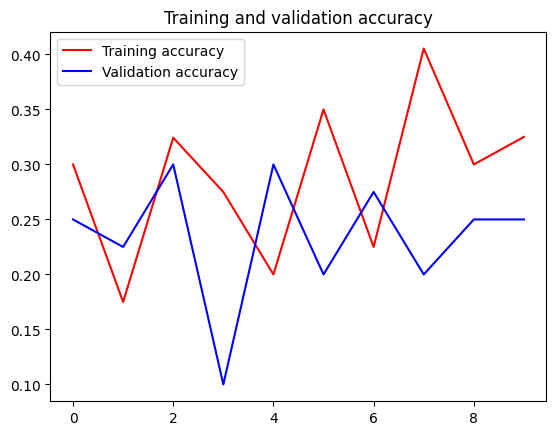

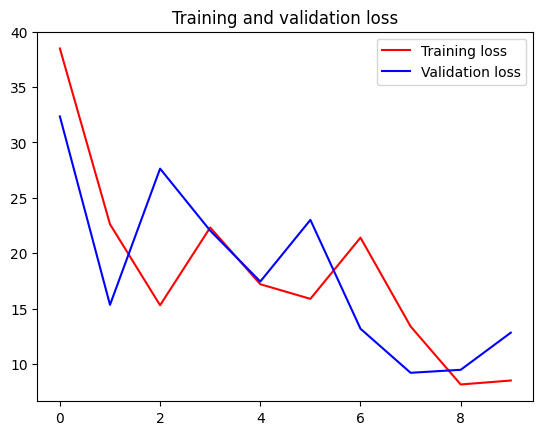

<Figure size 640x480 with 0 Axes>

In [31]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss , 'r', label='Training loss')
plt.plot  ( epochs, val_loss , 'b', label='Validation loss')
plt.title ('Training and validation loss'   )
plt.legend(loc=0)
plt.figure()


In [33]:

from keras.models import load_model

model.save('/content/drive/MyDrive/saved model/model_inception_23mei.h5')